In [2]:
import pandas as pd 
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import collections
from IPython.display import clear_output
from IPython.display import display
import random

In [5]:
#input whole dataset into dataframe
df_all = pd.read_excel(r'C:\Users\felic\Dropbox (MIT)\Spring 2021 Classes\20.440\Project\proteome signatures of inflammatory activated primary human peripheral blood moononuclear cells\1-s2.0-S1874391912005428-mmc2 cleaned up.xlsx')

display(df_all)



,found,accession,name,activated_fractions,activated_peptides,activated_nuc_expcount,activated_nuc_empai,activated_cyt_expcount,activated_cyt_empai,activated_sec_expcount,...,untreated_fractions,untreated_peptides,untreated_nuclei_expcount,untreated_nuclei_empai,untreated_cytoplasm_expcount,untreated_cytoplasm_empai,untreated_secreted_expcount,untreated_secreted_empai,empai_diff_nuclei,empai_diff_cytoplasm
0,both,P61604,"10 kDa heat shock protein, mitochondrial (Hsp1...","nuc, cyt, sec",13,1/5,0.874,9/9,1.438,1/3,...,cyt,8,0/5,0.000,8/9,0.920,0/1,0.0,0.874,0.518
1,both,Q15029,116 kDa U5 small nuclear ribonucleoprotein com...,nuc,16,5/5,0.315,0/9,0.000,0/3,...,nuc,14,5/5,0.220,0/9,0.000,0/1,0.0,0.095,0.000
2,both,P31946,14-3-3 protein beta/alpha (Protein kinase C in...,"nuc, cyt, sec",22,4/5,0.520,9/9,1.011,2/3,...,"nuc, cyt",18,5/5,0.612,9/9,1.161,0/1,0.0,-0.092,-0.150
3,both,P62258,14-3-3 protein epsilon (14-3-3E),"nuc, cyt, sec",18,4/5,0.374,9/9,0.885,2/3,...,"nuc, cyt",17,5/5,0.334,9/9,1.323,0/1,0.0,0.040,-0.438
4,both,Q04917,14-3-3 protein eta (Protein AS1),"nuc, cyt, sec",16,3/5,0.333,9/9,0.501,2/3,...,"nuc, cyt",14,2/5,0.771,9/9,0.749,0/1,0.0,-0.438,-0.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,both,Q969T9,WW domain-binding protein 2 (WBP-2),cyt,1,0/5,0.000,3/9,0.212,0/3,...,cyt,2,0/5,0.000,6/9,0.212,0/1,0.0,0.000,0.000
1565,both,P12955,Xaa-Pro dipeptidase (X-Pro dipeptidase) (Proli...,cyt,1,0/5,0.000,1/9,0.077,0/3,...,cyt,2,0/5,0.000,2/9,0.077,0/1,0.0,0.000,0.000
1566,both,Q9UPT8,Zinc finger CCCH domain-containing protein 4,nuc,2,4/5,0.051,0/9,0.000,0/3,...,nuc,2,2/5,0.062,0/9,0.000,0/1,0.0,-0.011,0.000
1567,both,O43670,Zinc finger protein 207,nuc,2,2/5,0.468,0/9,0.000,0/3,...,nuc,1,1/5,0.212,0/9,0.000,0/1,0.0,0.256,0.000


In [ ]:
#Break up activated and unactivated into separate dataframes 

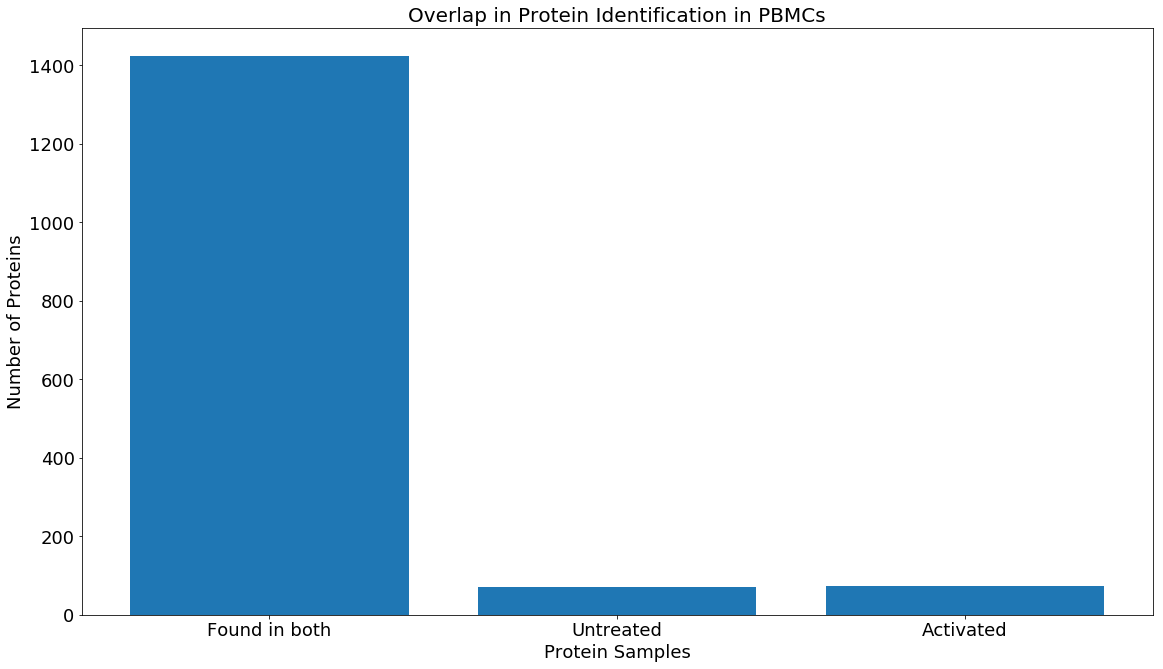

In [33]:
#Histogram of number of proteins identified for untreated, activated only, and both 

options_b = ['both']
both_df = df_all[df_all['found'].isin(options_b)]

#display(both_df)

options_un = ['untreated']
untreated_df = df_all[df_all['found'].isin(options_un)]

#display(untreated_df)

options_act = ['activated'] 
activated_only_df = df_all[df_all['found'].isin(options_act)]
#display(activated_only_df)


height = [len(both_df),len(untreated_df),len(activated_only_df)]
bars = ('Found in both','Untreated', 'Activated')
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(19.20,10.80))

plt.bar(y_pos, height)
plt.xlabel('Protein Samples', fontsize = 18)
plt.ylabel('Number of Proteins', fontsize = 18)
plt.title('Overlap in Protein Identification in PBMCs', fontsize =20)
plt.xticks(y_pos, bars, fontsize = 18)
plt.yticks(fontsize=18)
plt.show()



In [35]:

#input trimmed dataset into dataframe
df_trim = pd.read_excel(r'C:\Users\felic\Dropbox (MIT)\Spring 2021 Classes\20.440\Project\proteome signatures of inflammatory activated primary human peripheral blood moononuclear cells\activated_PBMC_trimmed.xlsx')

display(df_trim)

#Trimmed data contains only empai scores for both conditions in each fraction
#fractions include nucleus, cytoplasm, and secreted protein samples


,found,accession,name,activated_nuc_empai,activated_cyt_empai,activated_sec_empai,untreated_nuclei_empai,untreated_cytoplasm_empai,untreated_secreted_empai
0,both,P61604,"10 kDa heat shock protein, mitochondrial (Hsp1...",0.874,1.438,0.874,0.000,0.920,0.0
1,both,Q15029,116 kDa U5 small nuclear ribonucleoprotein com...,0.315,0.000,0.000,0.220,0.000,0.0
2,both,P31946,14-3-3 protein beta/alpha (Protein kinase C in...,0.520,1.011,0.781,0.612,1.161,0.0
3,both,P62258,14-3-3 protein epsilon (14-3-3E),0.374,0.885,0.645,0.334,1.323,0.0
4,both,Q04917,14-3-3 protein eta (Protein AS1),0.333,0.501,0.369,0.771,0.749,0.0
...,...,...,...,...,...,...,...,...,...
1564,both,Q969T9,WW domain-binding protein 2 (WBP-2),0.000,0.212,0.000,0.000,0.212,0.0
1565,both,P12955,Xaa-Pro dipeptidase (X-Pro dipeptidase) (Proli...,0.000,0.077,0.000,0.000,0.077,0.0
1566,both,Q9UPT8,Zinc finger CCCH domain-containing protein 4,0.051,0.000,0.000,0.062,0.000,0.0
1567,both,O43670,Zinc finger protein 207,0.468,0.000,0.000,0.212,0.000,0.0


In [36]:
from sklearn.preprocessing import StandardScaler 

conditions = ['activated_nuc_empai','activated_cyt_empai','activated_sec_empai','untreated_nuclei_empai','untreated_cytoplasm_empai','untreated_secreted_empai']


x = df_trim.loc[:, conditions].values

y = df_trim.loc[:,['found']].values

x = StandardScaler().fit_transform(x)

In [41]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])



In [38]:
finalDf = pd.concat([principalDF, df_trim[['found']]], axis =1)
display(finalDf)

,principal component 1,principal component 2,found
0,1.172389,0.238279,both
1,-0.585653,-0.138929,both
2,1.085260,0.085398,both
3,0.859811,0.157315,both
4,0.406180,-0.130036,both
...,...,...,...
1564,-0.571263,0.066614,both
1565,-0.703010,0.060165,both
1566,-0.737387,0.015812,both
1567,-0.533949,-0.194506,both


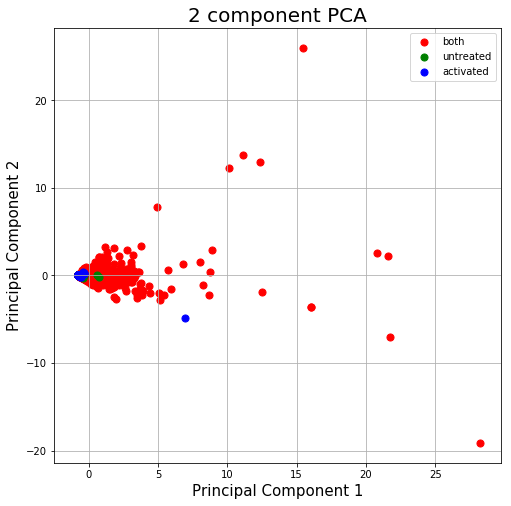

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
found_location = ['both', 'untreated', 'activated']
colors = ['r', 'g', 'b']
for found, color in zip(found_location,colors):
    indicesToKeep = finalDf['found'] == found
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(found_location)
ax.grid() 

fig.savefig('PCA for Activated PBMCs', bbox='tight')